# Import Library

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

from collections import Counter
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

import re
from nltk.corpus import wordnet, words
from nltk import pos_tag

# Before Text Preprocessing

## View Top 10 rows 

In [ ]:
file_1_path = r".\Ori_Hate_Speech_Dataset\Dynamically Generated Hate Dataset v0.2.3.csv"
data1= pd.read_csv(file_1_path, encoding='ISO-8859-1')
data1.head(10)

,Unnamed: 0,acl.id,X1,text,label,type,target,level,split,round.base,annotator,round,acl.id.matched
0,1,acl1,1,dalits are lowlives,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
1,2,acl10,2,gay people are a burden to our society,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
2,3,acl100,3,Arabs are not welcome,hate,notgiven,notgiven,original,train,1,vDe7GN0NrL,1,NaN
3,4,acl1000,4,I'm not saying we should actually eliminate he...,hate,notgiven,notgiven,original,train,1,oemYWm1Tjg,1,NaN
4,5,acl10000,5,bananas are for black people,hate,notgiven,notgiven,original,test,1,QiOKkCi7F8,1,NaN
5,6,acl10001,6,asian people are the shit,nothate,none,none,original,test,1,GNZuCtwed3,1,NaN
6,7,acl10002,7,women can not reproduce kids but men can in al...,hate,notgiven,notgiven,original,test,1,vDe7GN0NrL,1,NaN
7,8,acl10003,8,i hate wearing black in the summer!,nothate,none,none,original,test,1,LqLKTtrOmx,1,NaN
8,9,acl10004,9,Who cares what Chinese people think?,hate,notgiven,notgiven,original,test,1,CAgNlUizNm,1,NaN
9,10,acl10005,10,i try to punch a letter box when i see one,hate,notgiven,notgiven,original,test,1,LqLKTtrOmx,1,NaN


## Show Dataset unique labels

### First Dataset

In [3]:
file_1_path = r".\Ori_Hate_Speech_Dataset\Dynamically Generated Hate Dataset v0.2.3.csv"
data1 = pd.read_csv(file_1_path, encoding='ISO-8859-1')

# Checking unique values in the 'label' column
unique_labels = data1['label'].unique()
print(unique_labels, len(unique_labels))
data1.head(10)

['hate' 'nothate'] 2


,Unnamed: 0,acl.id,X1,text,label,type,target,level,split,round.base,annotator,round,acl.id.matched
0,1,acl1,1,dalits are lowlives,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
1,2,acl10,2,gay people are a burden to our society,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
2,3,acl100,3,Arabs are not welcome,hate,notgiven,notgiven,original,train,1,vDe7GN0NrL,1,NaN
3,4,acl1000,4,I'm not saying we should actually eliminate he...,hate,notgiven,notgiven,original,train,1,oemYWm1Tjg,1,NaN
4,5,acl10000,5,bananas are for black people,hate,notgiven,notgiven,original,test,1,QiOKkCi7F8,1,NaN
5,6,acl10001,6,asian people are the shit,nothate,none,none,original,test,1,GNZuCtwed3,1,NaN
6,7,acl10002,7,women can not reproduce kids but men can in al...,hate,notgiven,notgiven,original,test,1,vDe7GN0NrL,1,NaN
7,8,acl10003,8,i hate wearing black in the summer!,nothate,none,none,original,test,1,LqLKTtrOmx,1,NaN
8,9,acl10004,9,Who cares what Chinese people think?,hate,notgiven,notgiven,original,test,1,CAgNlUizNm,1,NaN
9,10,acl10005,10,i try to punch a letter box when i see one,hate,notgiven,notgiven,original,test,1,LqLKTtrOmx,1,NaN


### Second Dataset

In [6]:
file_2_path = r".\Ori_Hate_Speech_Dataset\Ethos_Dataset_Binary.csv"
data2= pd.read_csv(file_2_path, encoding='ISO-8859-1')
unique_labels = data2['isHate'].unique()
print(unique_labels, len(unique_labels))
data2.head(10)

[1.         0.98387097 0.98360656 0.97826087 0.97333333 0.96666667
 0.95454545 0.94545455 0.9375     0.90384615 0.85714286 0.8490566
 0.84615385 0.83333333 0.82142857 0.75       0.72222222 0.67857143
 0.66666667 0.60344828 0.53061225 0.5        0.4        0.33333333
 0.30232558 0.296875   0.25       0.2        0.16666667 0.16071429
 0.15254237 0.11111111 0.10344828 0.09090909 0.03896104 0.03773585
 0.03174603 0.03030303 0.02985075 0.02631579 0.01886793 0.01639344
 0.        ] 43


,comment,isHate
0,You should know women's sports are a joke,1.0
1,You look like Sloth with deeper Downs syndrome,1.0
2,You look like Russian and speak like Indian. B...,1.0
3,"Women deserve to be abused, I guess.",1.0
4,Women are made for making babies and cooking d...,1.0
5,why haven't you faggots taken the bi-pill yet,1.0
6,Why dont you go beck your god to murder you? ...,1.0
7,why does that african american monkey hold gun...,1.0
8,Why does Bulgaria exist as a country? It's one...,1.0
9,Why do negroes tear down their own neighborhoo...,1.0


In [18]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   comment  998 non-null    object 
 1   isHate   998 non-null    float64
dtypes: float64(1), object(1)
memory usage: 15.7+ KB


### Third Dataset

In [7]:
file_3_path = r".\Ori_Hate_Speech_Dataset\Hate_Speech_Dataset.csv"
data3= pd.read_csv(file_3_path, encoding='ISO-8859-1')
unique_labels = data3['label'].unique()
print(unique_labels, len(unique_labels))
data3.head(10)

['noHate' 'hate' 'idk/skip' 'relation'] 4


,file_id,user_id,subforum_id,num_contexts,label
0,12834217_1,572066,1346,0,noHate
1,12834217_2,572066,1346,0,noHate
2,12834217_3,572066,1346,0,noHate
3,12834217_4,572066,1346,0,hate
4,12834217_5,572066,1346,0,noHate
5,12834217_6,572066,1346,0,noHate
6,12834217_7,572066,1346,0,noHate
7,12834217_8,572066,1346,0,noHate
8,12834217_9,572066,1346,0,noHate
9,12834217_10,572066,1346,0,noHate


In [20]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10944 entries, 0 to 10943
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   file_id       10944 non-null  object
 1   user_id       10944 non-null  int64 
 2   subforum_id   10944 non-null  int64 
 3   num_contexts  10944 non-null  int64 
 4   label         10944 non-null  object
dtypes: int64(3), object(2)
memory usage: 427.6+ KB


### Forth Dataset

In [8]:
file_4_path = r".\Ori_Hate_Speech_Dataset\Train_Tweet.csv"
data4= pd.read_csv(file_4_path, encoding='ISO-8859-1')
unique_labels = data4['label'].unique()
print(unique_labels, len(unique_labels))
data4.head(10)

[0 1] 2


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.Ã°Â...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [22]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


## Check NULL

In [12]:
# info of dataset
file_path = r".\Pre_Hate_Dataset\3_CombineAllHateSpeech_Dataset.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1')
data.info()
print("\n")

data.isnull().sum()
missing_text_rows = data[data['text'].isnull()]
print(missing_text_rows)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84807 entries, 0 to 84806
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    84807 non-null  object
 1   label   84807 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


Empty DataFrame
Columns: [text, label]
Index: []


## Check Duplicated

In [13]:
file_path = r".\Pre_Hate_Dataset\3_CombineAllHateSpeech_Dataset.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1')

duplicate_rows = data[data.duplicated()]
print(f"Number of duplicated rows: {duplicate_rows.shape[0]}")
if not duplicate_rows.empty:
    print(duplicate_rows)

Number of duplicated rows: 2611
                                                    text  label
41047                           Blacks are such pondlife      1
41048                           Blacks are such pondlife      1
41051                           Blacks are such pondlife      1
41055                           Blacks are such pondlife      1
41094                             Muslims are a disgrace      1
...                                                  ...    ...
84731  100 amazing health benefits of cucumbers!    #...      0
84749  #model   i love u take with u all the time in ...      0
84775  @user #feminismiscancer #feminismisterrorism #...      1
84796  i've just posted a new blog: #secondlife #lone...      0
84805  @user #sikh #temple vandalised in in #calgary,...      1

[2611 rows x 2 columns]


## Distribution of hate and no hate

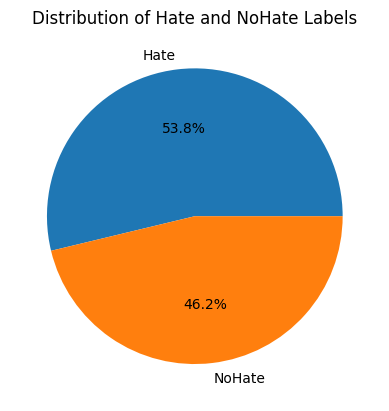

In [ ]:
file_path = r".\Pre_Hate_Dataset\3_CombineAllHateSpeech_Dataset.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1')

def hate_NoHate_percenatge(label):
    if label == 1:
        return "Hate"
    elif label == 0:
        return "NoHate"
    return "Unknown"

data['label'] = data['label'].apply(hate_NoHate_percenatge)

plt.pie(data['label'].value_counts(), labels=data['label'].value_counts().index, autopct='%1.1f%%')
plt.title("Distribution of Hate and NoHate Labels")
plt.show()


# Before DATA CLeaning EDA

## Dataset info

In [21]:
file_path = r".\Pre_Hate_Dataset\20_Hate_Final.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1')
print("After Text Preprocessing:")
data.info()

Before Text Preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84807 entries, 0 to 84806
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    84807 non-null  object
 1   label   84807 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


After Text Preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82064 entries, 0 to 82063
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    82064 non-null  object
 1   label   82064 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


## Distribution of hate and no hate

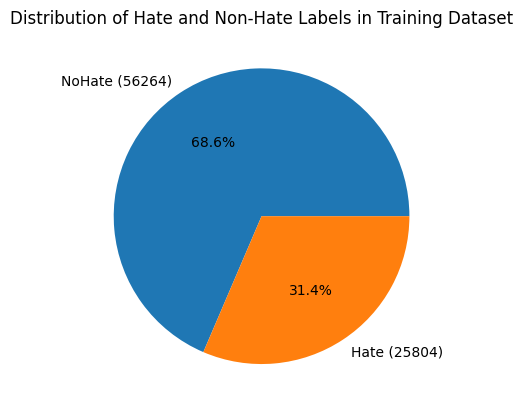

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = r".\Pre_Hate_Dataset\20_Hate_Final.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Convert label to text
def hate_NoHate_percenatge(label):
    if label == 1:
        return "Hate"
    elif label == 0:
        return "NoHate"
    return "Unknown"

data['label'] = data['label'].apply(hate_NoHate_percenatge)

# Get value counts
label_counts = data['label'].value_counts()
labels = [f"{label} ({count})" for label, count in label_counts.items()]

# Plot pie chart with counts in label
plt.pie(label_counts, labels=labels, autopct='%1.1f%%')
plt.title("Distribution of Hate and Non-Hate Labels in Training Dataset")
plt.show()


## Word Frequency

Most common words:
 [('not', 17600), ('people', 8320), ('woman', 5755), ('like', 5164), ('fuck', 5107), ('get', 4451), ('black', 4387), ('would', 3420), ('say', 3241), ('no', 3188)]


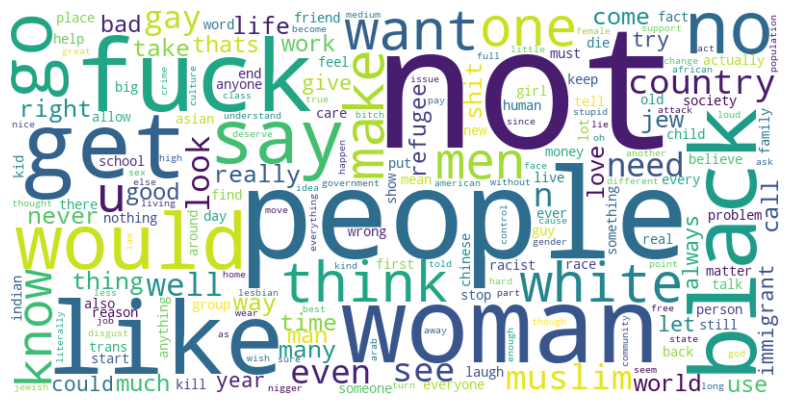

In [ ]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

file_path = r".\Pre_Hate_Dataset\20_Hate_Final.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Combine all text data into a single string
text_data = ' '.join(df['text'].astype(str)) 
words = word_tokenize(text_data)

word_counts = Counter(words)
most_common_words = word_counts.most_common(10) 
print("Most common words:\n", most_common_words)

# Create a word cloud from raw text data
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


Most common words (label == 1):
 [('not', 9732), ('people', 4283), ('woman', 3772), ('black', 2818), ('like', 2814), ('get', 2390), ('fuck', 2086), ('would', 1893), ('no', 1753), ('want', 1713)]


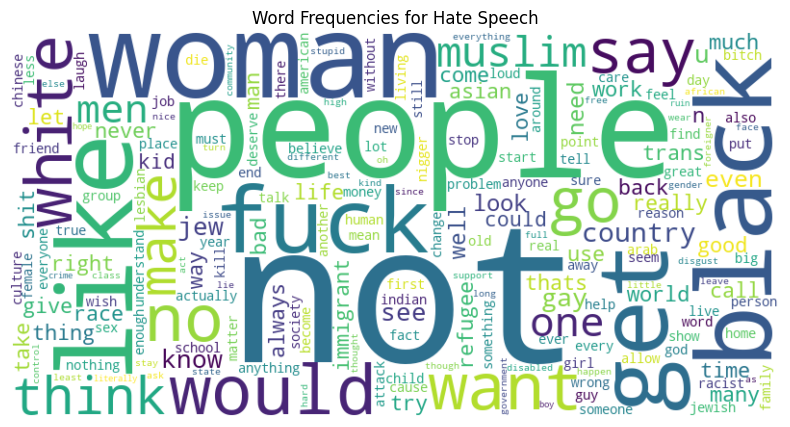

In [2]:
# word cloud hate 
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# Load the dataset
file_path = r".\Pre_Hate_Dataset\UnseenData_ForTestSetUsed.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Filter data for rows where label == 1
df_label_1 = df[df['label'] == 1]  # Filter rows where label == 1

# Combine all text data into a single string
text_data_label_1 = ' '.join(df_label_1['text'].astype(str)) 
words_label_1 = word_tokenize(text_data_label_1)

# Count word frequencies
word_counts_label_1 = Counter(words_label_1)
most_common_words_label_1 = word_counts_label_1.most_common(10) 
print("Most common words (label == 1):\n", most_common_words_label_1)

# Create a word cloud for label == 1
wordcloud_label_1 = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts_label_1)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_label_1, interpolation="bilinear")
plt.axis("off")
plt.title("Word Frequencies for Hate Speech")
plt.show()


## N-Gram

In [8]:
from nltk.util import ngrams 
# Download NLTK tokenizer if not already downloaded
nltk.download('punkt')

file_path = r".\Pre_Hate_Dataset\UnseenData_ForTestSetUsed.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

text_data = ' '.join(df['text'].astype(str))

tokens = word_tokenize(text_data)

# Function to generate n-grams
def get_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# Generate unigrams, bigrams, and trigrams
unigrams = get_ngrams(tokens, 1)
bigrams = get_ngrams(tokens, 2)
trigrams = get_ngrams(tokens, 3)

# Count the frequency of each n-gram
unigram_counts = Counter(unigrams)
bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

# Display the most common n-grams
print("Most Common Unigrams:", unigram_counts.most_common(10))
print("Most Common Bigrams:", bigram_counts.most_common(10))
print("Most Common Trigrams:", trigram_counts.most_common(10))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Most Common Unigrams: [(('not',), 17600), (('people',), 8320), (('woman',), 5755), (('like',), 5164), (('fuck',), 5107), (('get',), 4451), (('black',), 4387), (('would',), 3420), (('say',), 3241), (('no',), 3188)]
Most Common Bigrams: [(('black', 'people'), 918), (('not', 'want'), 817), (('people', 'not'), 634), (('would', 'not'), 569), (('woman', 'not'), 517), (('not', 'even'), 456), (('laugh', 'loud'), 438), (('not', 'get'), 380), (('not', 'like'), 377), (('look', 'like'), 375)]
Most Common Trigrams: [(('black', 'life', 'matter'), 248), (('would', 'not', 'want'), 108), (('black', 'people', 'not'), 105), (('kike', 'kike', 'kike'), 64), (('nike', 'nike', 'nike'), 64), (('think', 'twice', 'pas'), 56), (('twice', 'pas', 'thats'), 52), (('pas', 'thats', 'threat'), 52), (('bullshit', 'anyone', 'think'), 52), (('reason', 'world', 'suck'), 52)]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Most Common Unigrams: [(('user',), 17166), (('people',), 10012), (('like',), 7150), (('get',), 7113), (('woman',), 6359), (('dont',), 5461), (('fuck',), 5360), (('go',), 5216), (('black',), 5121), (('white',), 4442)]

Most Common Bigrams: [(('user', 'user'), 4543), (('black', 'people'), 963), (('father', 'day'), 632), (('look', 'like'), 595), (('dont', 'want'), 576), (('white', 'people'), 449), (('cant', 'wait'), 381), (('dont', 'know'), 361), (('gon', 'na'), 323), (('feel', 'like'), 320)]

Most Common Trigrams: [(('user', 'user', 'user'), 1906), (('blog', 'silver', 'gold'), 284), (('silver', 'gold', 'forex'), 263), (('happy', 'father', 'day'), 149), (('iam', 'positive', 'affirmation'), 129), (('bull', 'dominate', 'bull'), 80), (('dominate', 'bull', 'direct'), 80), (('bull', 'direct', 'whatever'), 80), (('direct', 'whatever', 'want'), 80), (('polar', 'bear', 'climb'), 78)]

### Unigrams

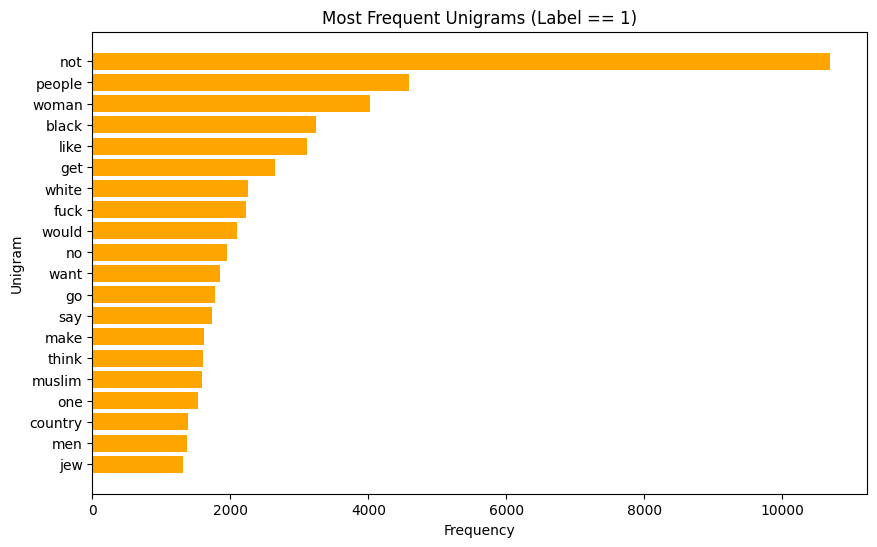

In [39]:
file_path = r".\Pre_Hate_Dataset\20_Hate_Final.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)

data_label_1 = data[data['label'] == 1]
text_data = data_label_1['text'] 

# Create a CountVectorizer for unigrams
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_data)

# Sum up the counts of each unigram
unigram_counts = X.toarray().sum(axis=0)
unigram_freq = pd.DataFrame({
    'unigram': vectorizer.get_feature_names_out(),
    'frequency': unigram_counts
})

# Sort by frequency in descending order
unigram_freq = unigram_freq.sort_values(by='frequency', ascending=False).head(20)

plt.figure(figsize=(10, 6))
plt.barh(unigram_freq['unigram'], unigram_freq['frequency'], color='orange') #Horizontal Bar Chart
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.title('Most Frequent Unigrams (Label == 1)')
plt.gca().invert_yaxis()  # Display the most frequent at the top
plt.show()


### Bigrams

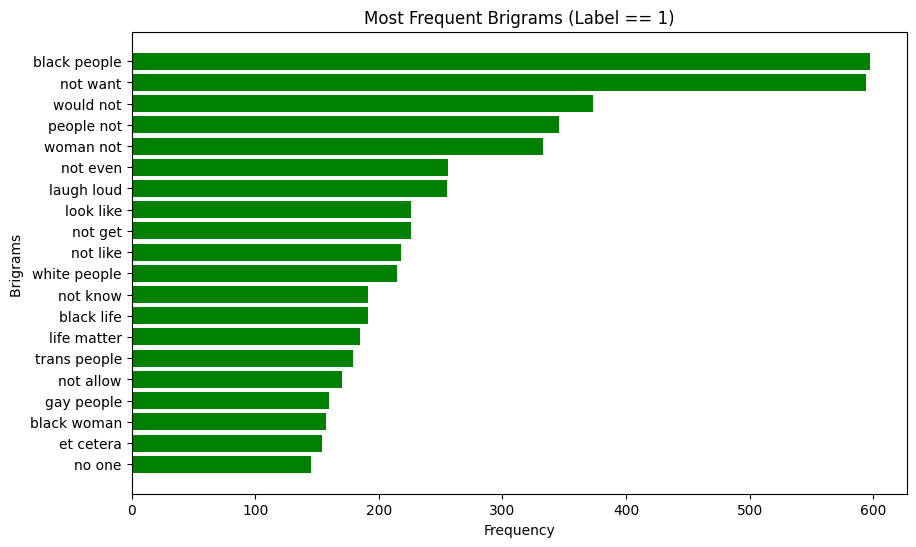

In [10]:
# Bigrams
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
file_path = r".\Pre_Hate_Dataset\UnseenData_ForTestSetUsed.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)

data_label_1 = data[data['label'] == 1]
text_data = data_label_1['text'] 

# Create a CountVectorizer for bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(text_data)

# Use sparse matrix to sum up bigram counts
bigram_counts = np.array(X.sum(axis=0)).flatten()
bigram_freq = pd.DataFrame({
    'bigram': vectorizer.get_feature_names_out(),
    'frequency': bigram_counts
})

# Sort by frequency in descending order and take the top 20
bigram_freq = bigram_freq.sort_values(by='frequency', ascending=False).head(20)

# Plot the most frequent bigrams
plt.figure(figsize=(10, 6))
plt.barh(bigram_freq['bigram'], bigram_freq['frequency'], color='green')
plt.xlabel('Frequency')
plt.ylabel('Brigrams ')
plt.title('Most Frequent Brigrams (Label == 1)')
plt.gca().invert_yaxis()  # Display the most frequent at the top
plt.show()


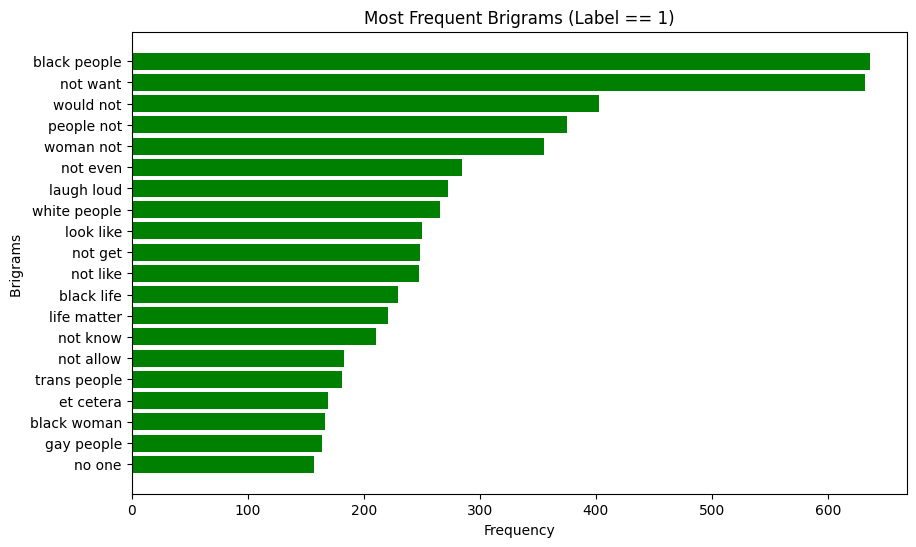

### Tigrams

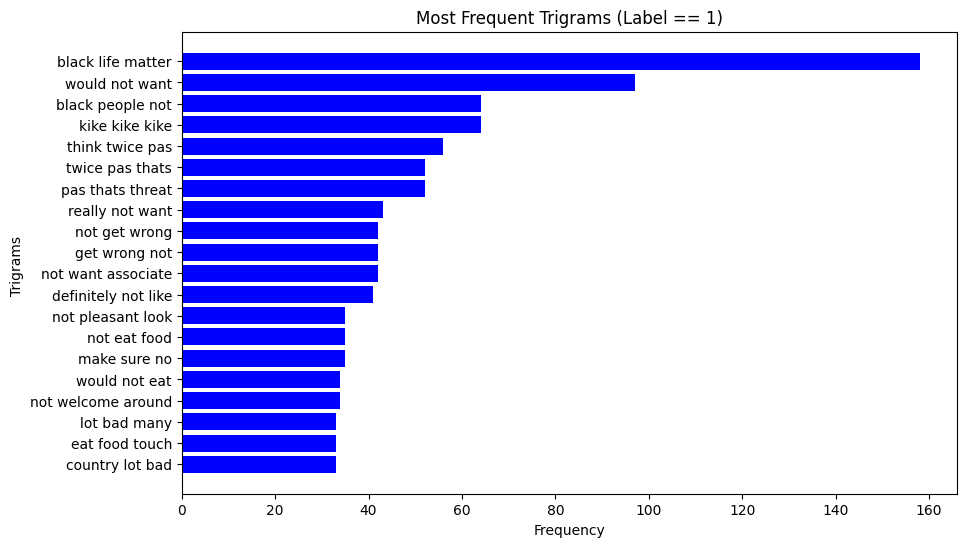

In [11]:
file_path = r".\Pre_Hate_Dataset\UnseenData_ForTestSetUsed.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)

data_label_1 = data[data['label'] == 1]
text_data = data_label_1['text']

vectorizer = CountVectorizer(ngram_range=(3, 3))  
X = vectorizer.fit_transform(text_data)

bigram_counts = np.array(X.sum(axis=0)).flatten() 
bigram_freq = pd.DataFrame({
    'bigram': vectorizer.get_feature_names_out(),
    'frequency': bigram_counts
})

bigram_freq = bigram_freq.sort_values(by='frequency', ascending=False).head(20)

plt.figure(figsize=(10, 6))
plt.barh(bigram_freq['bigram'], bigram_freq['frequency'], color='blue')
plt.xlabel('Frequency')
plt.ylabel('Trigrams ')
plt.title('Most Frequent Trigrams (Label == 1)')
plt.gca().invert_yaxis()
plt.show()


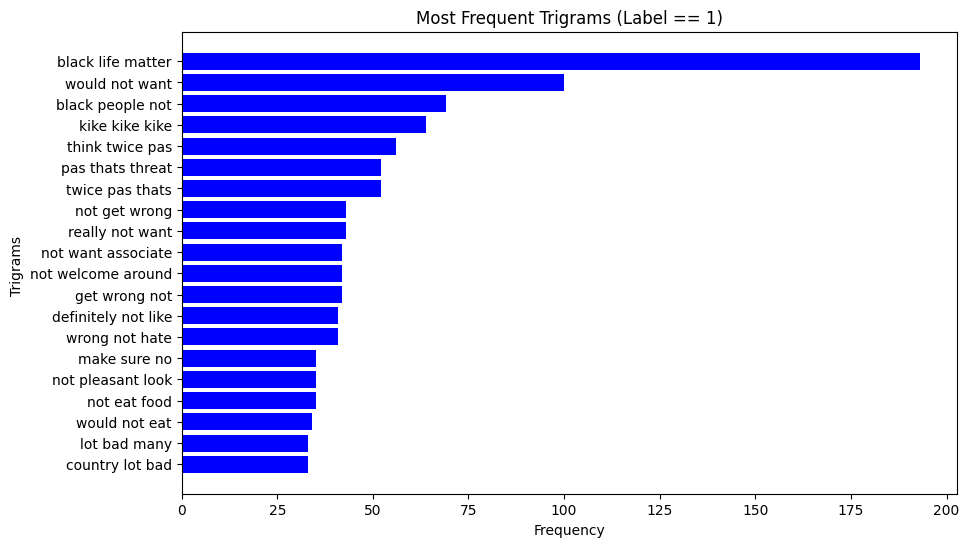

## Unknow Word

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


              word  frequency
10           trans        990
1043       youtube        557
461         others        498
541             et        421
542         cetera        406
13502          sta        233
220           haha        222
89          barack        220
267        happens        217
90           obama        210
4379          2016        208
11975          hea        188
159         womens        174
13517    instagood        170
68          tranny        148
54             soo        141
16     coronavirus        137
140       trannies        136
13409     euro2016        131
1142        reddit        128


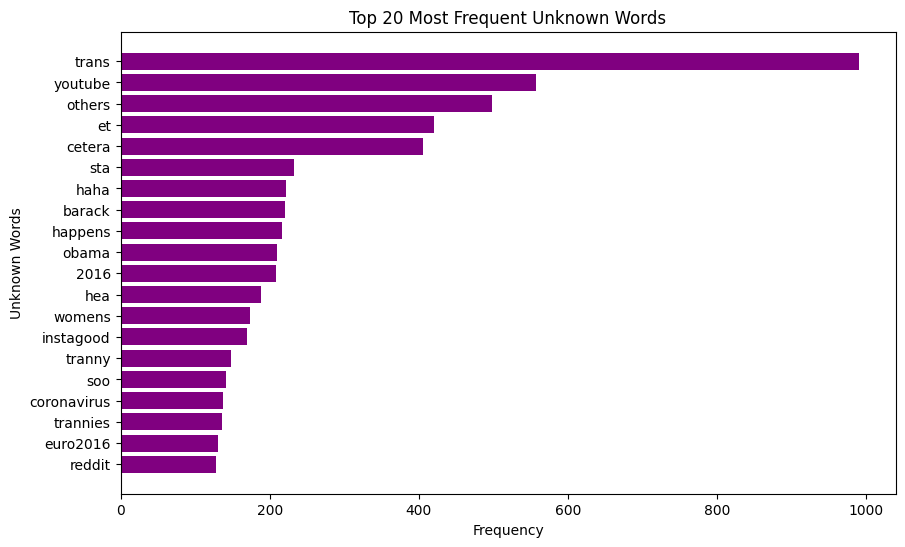

In [38]:
nltk.download('wordnet')
nltk.download('words')

file_path = r".\Pre_Hate_Dataset\20_Hate_Final.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)
text_data = data['text']

# Combine WordNet and NLTK word list vocabularies
combined_vocab = set(words.words()) | set(wordnet.words())

def find_unknown_words_combined(text):
    if not isinstance(text, str):  # Skip non-string values
        return []
    words_in_text = re.findall(r'\b\w+\b', text.lower())  # Extract words (ignoring punctuation)
    return [word for word in words_in_text if word not in combined_vocab]
data['unknown_words'] = data['text'].apply(find_unknown_words_combined)

# Flatten all unknown words into a single list
all_unknown_words = [word for words in data['unknown_words'] for word in words]

# Calculate the frequency of each unknown word
unknown_word_freq = Counter(all_unknown_words)

# Convert frequency to a DataFrame for visualization
freq_df = pd.DataFrame(unknown_word_freq.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)
print(freq_df.head(20))

top_unknown = freq_df.head(20)
plt.figure(figsize=(10, 6))
plt.barh(top_unknown['word'], top_unknown['frequency'], color='purple')
plt.xlabel('Frequency')
plt.ylabel('Unknown Words')
plt.title('Top 20 Most Frequent Unknown Words')
plt.gca().invert_yaxis()
plt.show()


## POS Tag

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


     POS   Count
3     NN  385113
1     JJ  178294
4     RB   80845
5     VB   49876
2    VBP   46677
0    NNS   34727
12    IN   19257
7     CD   16778
10   VBD   13661
16    MD    8822
15    DT    6812
6    VBN    5568
13   VBG    5567
9    VBZ    5431
14   JJS    2338
21   JJR    1544
20   RBR    1111
17   NNP    1106
11    FW     852
8     CC     721
19    RP     647
29    UH     584
23   PRP     570
18    WP     519
25   WDT     497
22    TO     486
26    EX     361
24   WRB     276
28   RBS     160
31     $      79
30   WP$      64
34  PRP$      22
32   PDT      11
27   SYM       9
33    ''       8
35  NNPS       4
36   POS       4
37    LS       1


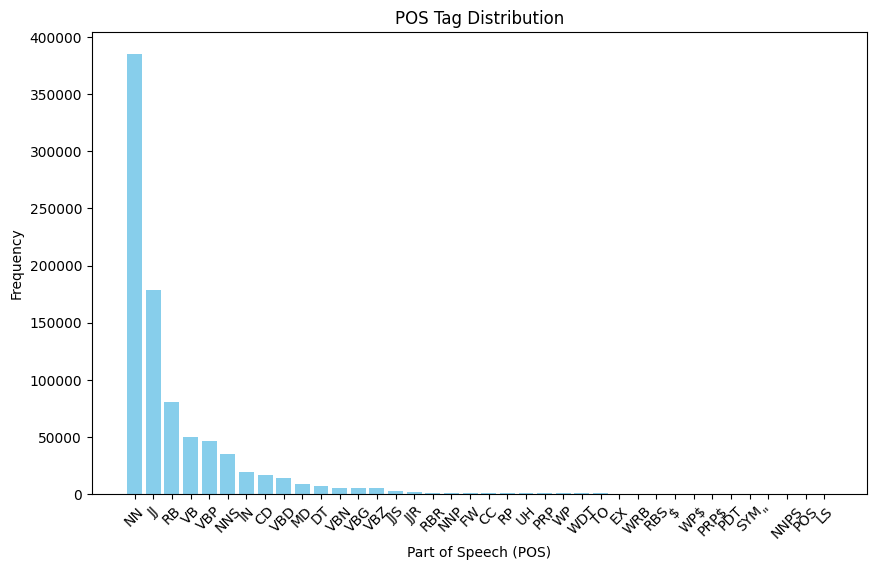

In [ ]:
import pandas as pd
import nltk
from nltk import pos_tag, word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

# downloaded NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

file_path = r".\Pre_Hate_Dataset\20_Hate_Final.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)

text_data = data['text']

# Function to get POS tags for a text
def get_pos_tags(text):
    if not isinstance(text, str):  # Skip non-string values
        return []
    tokens = word_tokenize(text)  # Tokenize the text
    return pos_tag(tokens)  # Get POS tags for tokens

# Apply POS tagging to the text
data['pos_tags'] = data['text'].apply(get_pos_tags)

# Flatten all POS tags into a single list
all_pos_tags = [tag for tags in data['pos_tags'] for _, tag in tags]

# Count the occurrences of each POS tag
pos_counts = Counter(all_pos_tags)

# Convert POS counts to a DataFrame for visualization
pos_df = pd.DataFrame(pos_counts.items(), columns=['POS', 'Count']).sort_values(by='Count', ascending=False)
print(pos_df)

# Plot the POS tag distribution
plt.figure(figsize=(10, 6))
plt.bar(pos_df['POS'], pos_df['Count'], color='skyblue')
plt.xlabel('Part of Speech (POS)')
plt.ylabel('Frequency')
plt.title('POS Tag Distribution')
plt.xticks(rotation=45)
plt.show()


# Others

In [56]:
# check word in WordNet
from nltk.corpus import wordnet

words_to_check = ['others']
for word in words_to_check:
    print(f"{word}: {'Exists in WordNet' if wordnet.synsets(word) else 'Not in WordNet'}")


others: Not in WordNet


In [58]:
# check word in Words
nltk.download('words')
nltk_word_list = set(words.words()) 

words_to_check = ['other']
for word in words_to_check:
    print(f"{word}: {'Exists in NLTK Word List' if word in nltk_word_list else 'Not in NLTK Word List'}")


other: Exists in NLTK Word List


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
